In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def text_to_prompts(text):
    # Split the text into sentences using full stops as delimiters
    sentences = text.split(".")

    # Remove any empty strings resulting from consecutive full stops
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    return sentences

# Example usage:
text = "There was a gleaming red stone nestled on a table . Suddenly, red light was coming from the red stone that rested on the stone that lay on the floor, casting a crimson glow around in the room. It shattered into tiny red pieces, scattering across the floor. In the aftermath, a mysterious red shadow loomed in the room, adding an air of intrigue to the scene."



#"In the middle of the city, the busy square hummed with life, surrounded by shops and cafes. The big mall stood tall nearby, its shiny windows reflecting the crowds. Inside, lots of people moved around, looking at things and chatting. Everywhere, the city center and mall were alive with the excitement of so many people."

prompts = text_to_prompts(text)
print(prompts)

['There was a gleaming red stone nestled on a table', 'Suddenly, red light was coming from the red stone that rested on the stone that lay on the floor, casting a crimson glow around in the room', 'It shattered into tiny red pieces, scattering across the floor', 'In the aftermath, a mysterious red shadow loomed in the room, adding an air of intrigue to the scene']


In [ ]:
from diffusers import SemanticStableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Initialize the device (e.g., 'cuda' or 'cpu')
device = 'cuda'

def find_adjective_noun_in_prompts(prompts):
    all_adjective_noun_pairs = []
    for prompt in prompts:
        tokens = word_tokenize(prompt)
        tagged_words = pos_tag(tokens)

        adjective_noun_pairs = []
        for i in range(len(tagged_words) - 1):
            word, tag = tagged_words[i]
            next_word, next_tag = tagged_words[i + 1]
            if tag.startswith('JJ') and next_tag.startswith('NN'):
                adjective_noun_pairs.append((word, next_word))

        all_adjective_noun_pairs.extend(adjective_noun_pairs)
    return all_adjective_noun_pairs

# Load the Diffusion Model pipeline
pipe = SemanticStableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)

# Define the prompts
text =  text

prompts = text_to_prompts(text)

# Find adjective-noun pairs in prompts
all_adjective_noun_pairs = find_adjective_noun_in_prompts(prompts)

# Construct editing prompts using adjective-noun pairs
editing_prompts = [
    ", ".join(pair) for pair in all_adjective_noun_pairs
]

# Set up the generator
gen = torch.Generator(device=device)

# Set a seed for reproducibility (optional)
gen.manual_seed(21)

# Now you can use 'editing_prompts' for further processing

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Number of generated images: 4
Displaying image 1/4
Displaying image 2/4
Displaying image 3/4
Displaying image 4/4


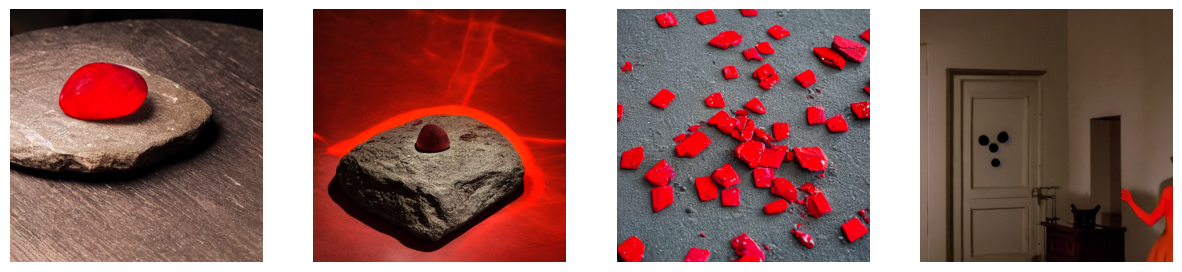

In [ ]:
# Generate images based on the prompts and editing prompts
images = []
for prompt, editing_prompt in zip(prompts, editing_prompts):
    try:
        out = pipe(
            prompt=prompt,
            generator=gen,
            num_images_per_prompt=1,
            guidance_scale=7,
            editing_prompt=[editing_prompt],
            reverse_editing_direction=[False],
            edit_warmup_steps=[10],
            edit_guidance_scale=[4],  # Ensure this is of the correct data type
            edit_threshold=[0.99],
            edit_momentum_scale=0.3,
            edit_mom_beta=0.6,
            edit_weights=[1]
        )
        images.extend(out.images)
    except Exception as e:
        print(f"Error generating images: {e}")

# Display all generated images
num_images = len(images)
print(f"Number of generated images: {num_images}")

plt.figure(figsize=(15, 10))
for i, image in enumerate(images):
    print(f"Displaying image {i+1}/{num_images}")
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()